# [Data analysis project] Iris Flower Dataset

## Import libraries

In [1]:
# Uses kernel: anaconda3 (Python 3.9.7)
# Import python packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset 

In [2]:
# Load the iris_dataset and store it in the variable 'df'
df = pd.read_csv("/Users/samtaylor/Desktop/Data/Projects/q32023_iris_dataset_medium_blogpost/iris_dataset.csv")

## Data exploration

In [3]:
# Display the first 5 rows of data

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Display the last 5 rows of data

df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Display a summary of the dataset and its columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Display a statistical summary of the dataset and its columns

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Count missing values in the dataset

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Examine rows with missing values in any of the columns

df.loc[df.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [9]:
# Remove any rows where there are missing values

df = df.dropna()

In [10]:
# Fill rows where there are missing values with the average value 
# of each column
 
#df = df.fillna(df.mean())

In [11]:
# Count duplicate values

df.duplicated().sum()

3

In [12]:
# Check the duplicate rows

df.loc[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [13]:
# Create a z-score for the column 'sepal_length'

from scipy import stats

z_scores = stats.zscore(df['sepal_length'])

# Display the z-scores
z_scores

0     -0.900681
1     -1.143017
2     -1.385353
3     -1.506521
4     -1.021849
         ...   
145    1.038005
146    0.553333
147    0.795669
148    0.432165
149    0.068662
Name: sepal_length, Length: 150, dtype: float64

In [14]:
# Check rows with a z-score over 3

df[(z_scores > 3)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [15]:
# Remove any rows with a z-score over 3 (keep rows with a z-score < 3)

df = df[(z_scores < 3)]

In [16]:
# Save the cleaned data to a csv file on your computer

# df.to_csv('cleaned_iris.csv', index=False)

## Visualise dataset 

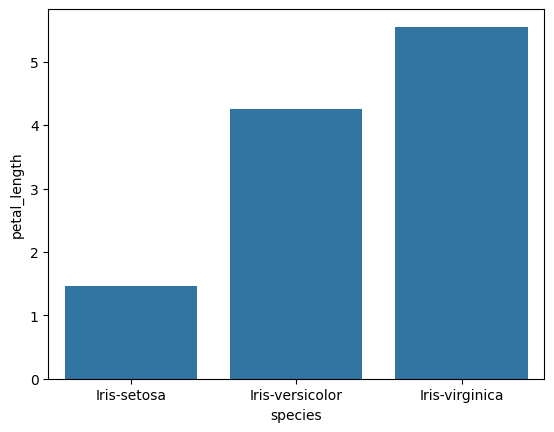

In [17]:
# Create a bar plot showing the petal length of each flower species

sns.barplot(x='species', y='petal_length', data=df, errorbar=None);

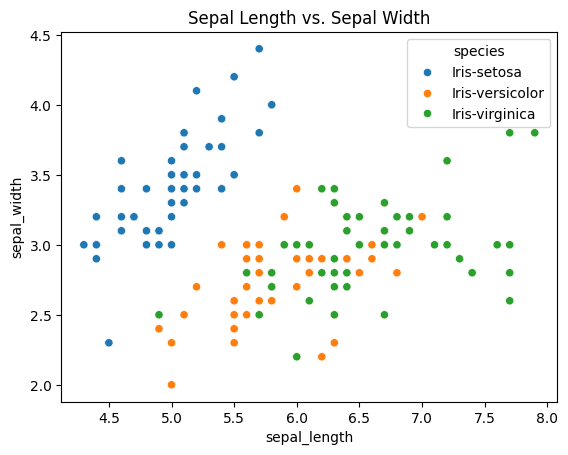

In [18]:
# Create a scatter plot of sepal_length and sepal_width

sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')

plt.title('Sepal Length vs. Sepal Width')

plt.show();

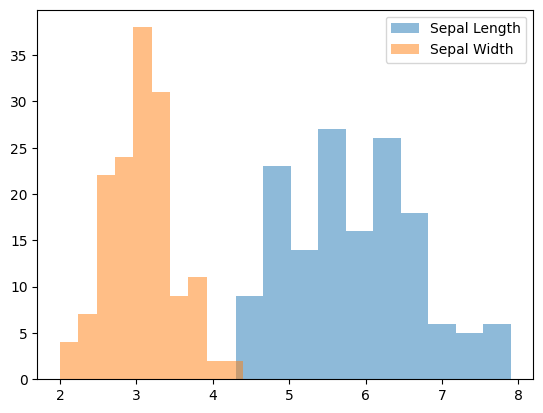

In [19]:
# Create a histogram to show the distribution of sepal length and sepal width

plt.hist(df['sepal_length'], bins=10, alpha=0.5, label='Sepal Length')

plt.hist(df['sepal_width'], bins=10, alpha=0.5, label='Sepal Width')

plt.legend(loc='upper right');

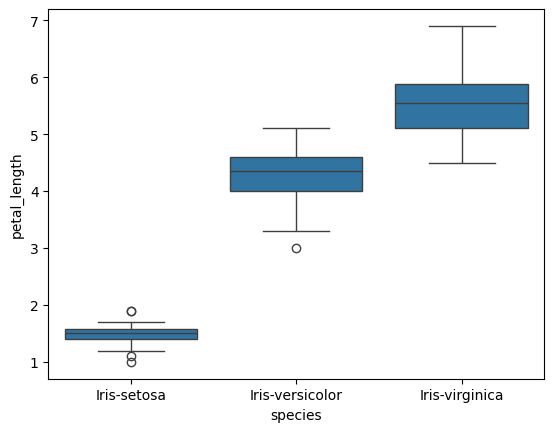

In [20]:
# Create a box plot to show the petal length by species

sns.boxplot(x='species', y='petal_length', data=df);

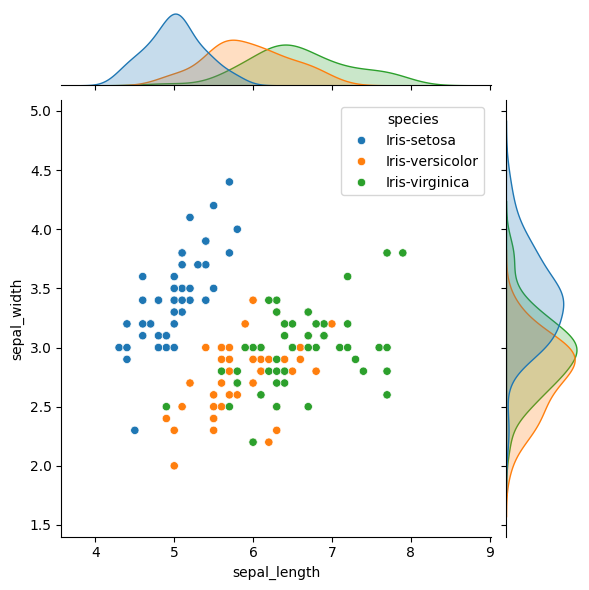

In [21]:
# Create a joint plot to compare the sepal length by sepal width

sns.jointplot(x='sepal_length', y='sepal_width', data=df, kind='scatter',hue='species');

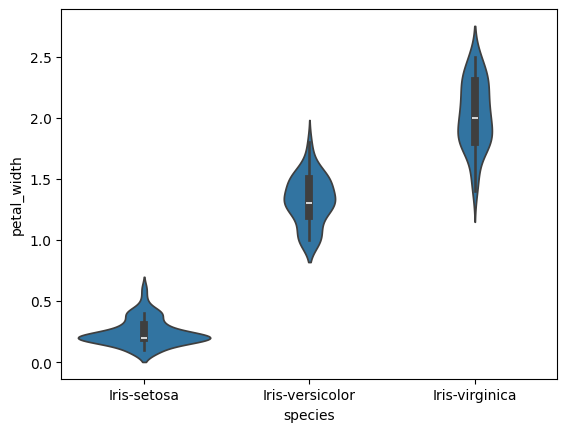

In [22]:
# Create a violin plot to see the petal width by species 

sns.violinplot(x='species', y='petal_width', data=df);

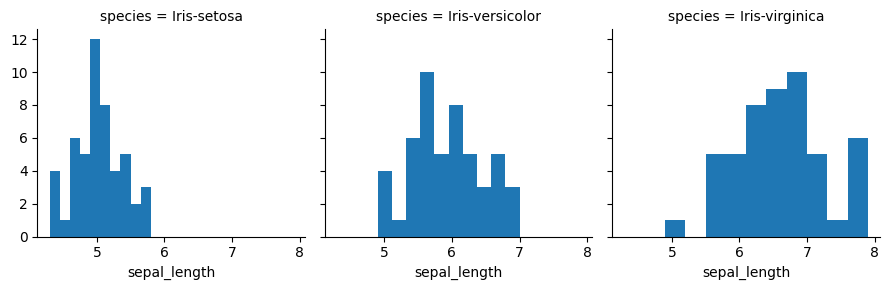

In [23]:
# Create a facet grid to show sepal length by species

g = sns.FacetGrid(df, col='species')

g.map(plt.hist, 'sepal_length');

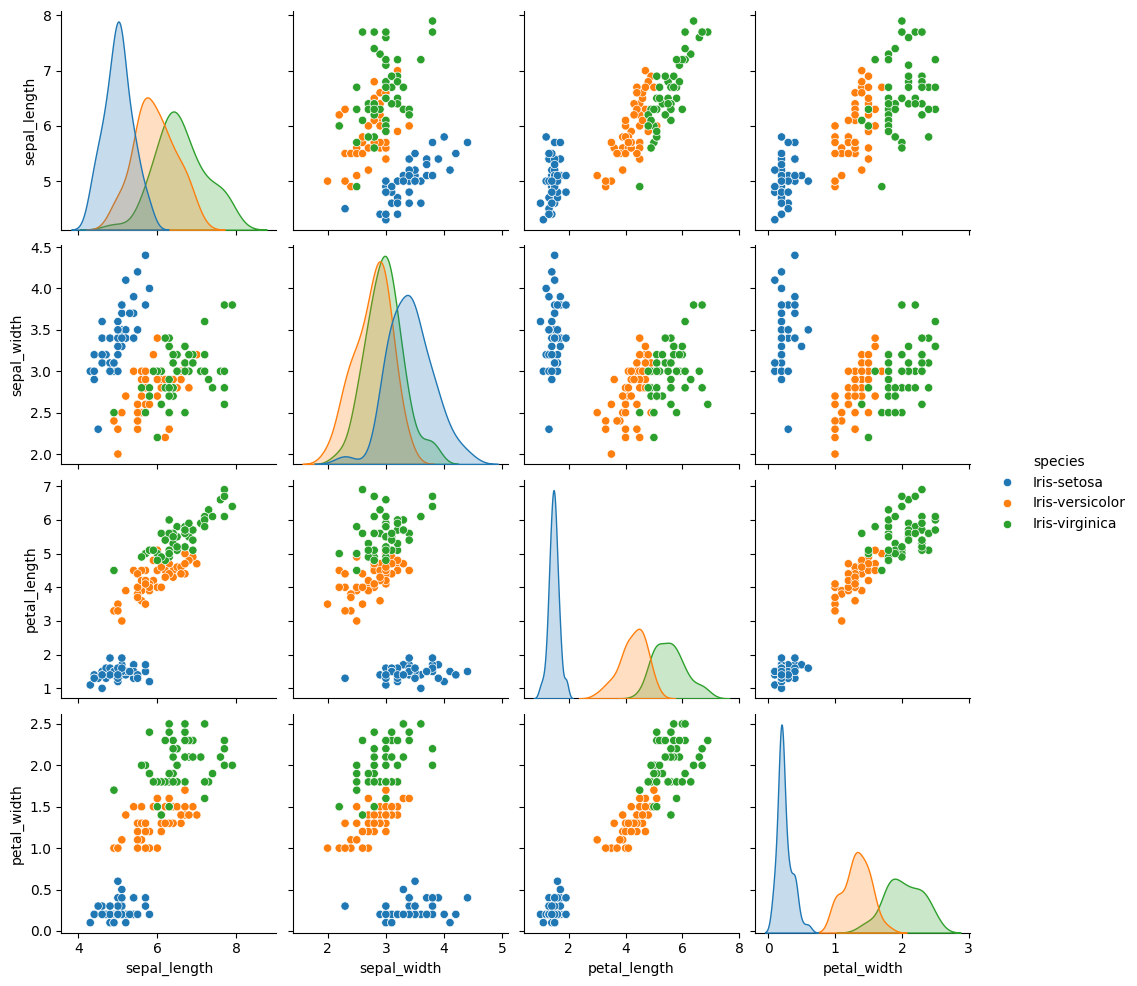

In [24]:
# Create a pair plot to compare our dataframe across multiple graphs

sns.pairplot(df, hue='species');

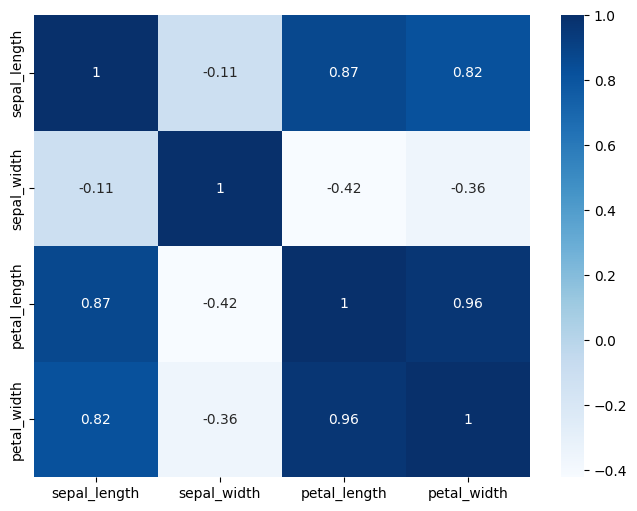

In [25]:
# Create a correlation matrix of our data to show the relationships between columns

## We drop the column "species" as it isn't a numerical column and cannot be plotted
correlation_matrix = df.drop(columns=["species"]).corr()

# We make the correlation matrix bigger
plt.figure(figsize=(8, 6))

# We plot the correlation_matrix and set the value labels (annot) and the colours (cmap)
sns.heatmap(correlation_matrix, annot=True, cmap='Blues');

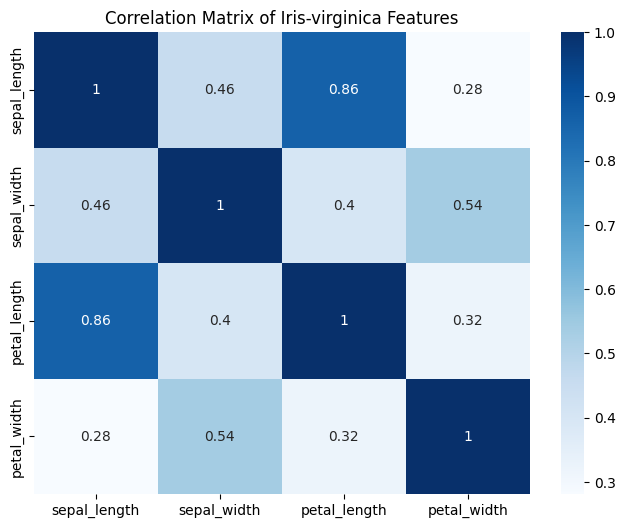

In [26]:
# Create a correlation matrix for the Iris Virginica species

# Filter the dataframe for 'Iris-virginica'
df_virginica = df[df["species"] == "Iris-virginica"]

# Drop the 'species' column
df_virginica = df_virginica.drop(columns=["species"])

# Compute the correlation matrix
correlation_matrix = df_virginica.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Iris-virginica Features')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df[
    ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [29]:
# Create two new columns: sepal_ratio and petal_ratio

df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']
df['petal_ratio'] = df['petal_length'] / df['petal_width']

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio,petal_ratio
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa,-0.872705,1.021551
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa,9.147238,1.021551
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa,-4.100517,1.064861
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa,-14.152993,0.978240
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa,-0.808770,1.021551


## Statistical analysis

### Hypothesis

<b> Define hypotheses: </b>

- Null hypothesis: 
    - There's no difference in sepal length between Iris species.
- Alternative hypothesis:
    - Sepal length differs between Iris species.


### Import libraries

In [31]:
# Uses kernel: anaconda3 (Python 3.9.7)
# Import python packages
import numpy as np
import scipy.stats as stats


### Visualise

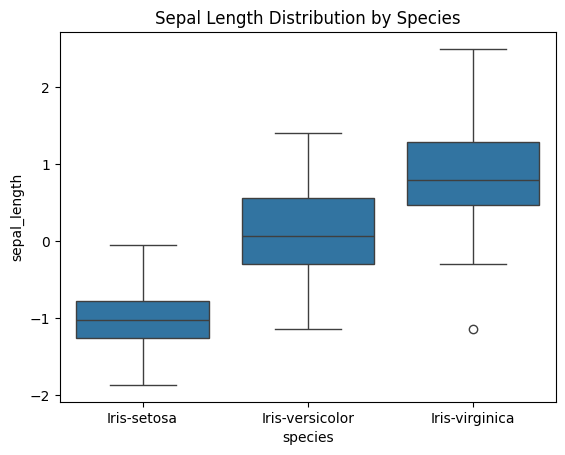

In [32]:
# Group the data by species
grouped = df.groupby(df.species)

# Visualize the data
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length Distribution by Species')
plt.show()


### Check for normal distribution

In [33]:
# Extract the 'sepal_length' data for each species
setosa_sepal_length = df[df['species'] == 'Iris-setosa']['sepal_length']
versicolor_sepal_length = df[df['species'] == 'Iris-versicolor']['sepal_length']
virginica_sepal_length = df[df['species'] == 'Iris-virginica']['sepal_length']

# Perform Shapiro-Wilk test for normality
shapiro_test_setosa = stats.shapiro(setosa_sepal_length)
shapiro_test_versicolor = stats.shapiro(versicolor_sepal_length)
shapiro_test_virginica = stats.shapiro(virginica_sepal_length)

# Return a message depending on the result of the p-value
if shapiro_test_setosa.pvalue > 0.05:
    print("Setosa Sepal Length is normally distributed (p-value:", shapiro_test_setosa.pvalue, ")")
else:
    print("Setosa Sepal Length is not normally distributed (p-value:", shapiro_test_setosa.pvalue, ")")


Setosa Sepal Length is normally distributed (p-value: 0.4595065116882324 )


### Check for equal variance

In [34]:
from scipy.stats import levene

# Perform Levene's test (remember: we defined 'grouped' in our code above)
statistic, p_value = levene(
    grouped.get_group("Iris-setosa")["sepal_length"],
    grouped.get_group("Iris-versicolor")["sepal_length"],
    grouped.get_group("Iris-virginica")["sepal_length"],
)

alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. Variance is not equal (p-value: {p_value})")
else:
    print(f"Fail to reject the null hypothesis. Variance is equal (p-value: {p_value})")

Reject the null hypothesis. Variance is not equal (p-value: 0.0022585277836218586)


### Check for statistical significance

In [35]:
# Check for statistical significance 

import pingouin as pg

# Welch's ANOVA test
result = pg.welch_anova(data=df, dv='sepal_length', between='species')

# Access the p-value from the result
p_value = result['p-unc'].values[0]

# Format the p-value to display with all decimals
formatted_p_value = "{:.35f}".format(p_value)

# Return a message depending on the result of the p-value
if p_value < 0.05:
    print(f"The sepal length differs significantly between Iris species. \np-value: {formatted_p_value}")
else:
    print(f"There's no significant difference in sepal length between Iris species. \np-value: {formatted_p_value}")


The sepal length differs significantly between Iris species. 
p-value: 0.00000000000000000000000000015050590


### Assess direction of significance

In [36]:
# Check which direction the statistical relationship is
## We know that there is a statistical difference - but not the direction of the difference

# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

# Fit a one-way ANOVA model
model = ols('sepal_length ~ species', data=df).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Create a MultiComparison object for post-hoc tests
mc = MultiComparison(df['sepal_length'], df['species'])

# Perform Tukey's HSD post-hoc test
tukey_result = mc.tukeyhsd()

# Display the results
print("Tukey's HSD Post-Hoc Test:")
print(tukey_result)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Tukey's HSD Post-Hoc Test:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1          group2     meandiff p-adj lower  upper  reject
-------------------------------------------------------------------
    Iris-setosa Iris-versicolor   1.1269   0.0 0.8315 1.4222   True
    Iris-setosa  Iris-virginica   1.9169   0.0 1.6215 2.2122   True
Iris-versicolor  Iris-virginica     0.79   0.0 0.4946 1.0854   True
-------------------------------------------------------------------


## Machine learning: predict the species

### Import libraries

In [37]:
# Random forest (supervised learning)

# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
# Split our data into features (X) and variable to predict (Y)
X = df.drop('species', axis=1)
y = df['species']

### Train-test split

In [39]:
# Create a train-test split of our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Instantiate model

In [40]:
# Initialise our model
model = RandomForestClassifier()

### Train model

In [41]:
# Train the model on our training data
model.fit(X_train, y_train)

RandomForestClassifier()

### Model evaluation

In [42]:
# Ask our model to predict what Y would be, given our test data
y_pred = model.predict(X_test)

In [43]:
# Compare our test data with our predictions, and see how accurate our model is
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [44]:
# classification report 
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### Model visualisation

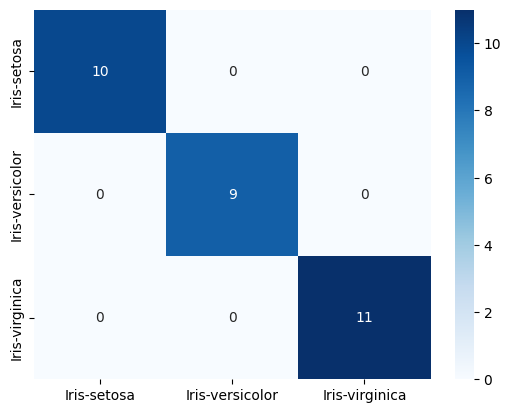

In [45]:
# confusion_matrix
cm = confusion_matrix(y_pred, y_test)

x_axis_labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"] # labels for x-axis
y_axis_labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"] # labels for y-axis

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels);